**Maria Antonette O. Castillo**

**CPE32S8**

-------------------------

## **Mood Detection with OpenCV**

### **Detect face using a webcam and save it as images:** 

In [ ]:
"""

import cv2
import os

def detect(folder_path):
    """
    Detects faces in a webcam feed and saves them in a specified folder.

    Args:
        folder_path (str): The path to the folder where detected faces will be saved.
    """

    face_cascade = cv2.CascadeClassifier(r'C:\Users\maria\Downloads\haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(r'C:\Users\maria\Downloads\haarcascade_eye.xml')
    camera = cv2.VideoCapture(0)

    i = 0  # Counter for saving images

    while True:
        ret, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            img = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            roi_gray = gray[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, 0, (40, 40))

            #for (ex, ey, ew, eh) in eyes:
                #cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

            # Save the detected face region with a descriptive filename:
            face_filename = f"detected_face_{i}.jpg"
            face_path = os.path.join(folder_path, face_filename)
            cv2.imwrite(face_path, roi_gray)
            i += 1

            # Display the frame with detected faces and eye rectangles:
            cv2.imshow("camera", frame)

        if cv2.waitKey(1000 // 12) & 0xff == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Specify the folder path where you want to save detected faces:
    folder_path = r'C:\Users\maria\Downloads\emotions\sad'  # Replace with your actual folder path
    detect(folder_path) 
"""

### **Importing libraries:** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")

### **Preparing images data for training:** 

In [2]:
# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255,
    validation_split=0.2  
)
# Data generator for training data
train_data = train_datagen.flow_from_directory(
    directory=r'C:\Users\maria\Downloads\emotions', 
    target_size=(224, 224), 
    batch_size=32,
    subset='training' 
)
# Data generator for validation data
validation_data = train_datagen.flow_from_directory(
    directory=r'C:\Users\maria\Downloads\emotions', 
    target_size=(224, 224), 
    batch_size=32,
    subset='validation'  
)

class_indices = train_data.class_indices

Found 383 images belonging to 4 classes.
Found 93 images belonging to 4 classes.


### **Training the model:** 

In [3]:
from keras.applications import MobileNet

MobileNet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
MobileNet_model.summary()



Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 

In [4]:
# Freeze all layers except the last 10 layers of the MobileNet model
for layer in MobileNet_model.layers[:-10]:
    layer.trainable = False

# Unfreeze the last 10 layers of the MobileNet model
for layer in MobileNet_model.layers[-10:]:
    layer.trainable = True

# Create a Sequential model
model = Sequential()
model.add(MobileNet_model)
model.add(GlobalAveragePooling2D())

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 100)               102500    
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4

In [5]:
# Compile the model 
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Train the model using the training data generator for 15 epochs
history = model.fit_generator(
    train_data,
    epochs=15,
    validation_data=validation_data
)

Epoch 1/15


22/22 [==============================] - 24s 864ms/step - loss: 1.7148 - accuracy: 0.3979 - val_loss: 1.5912 - val_accuracy: 0.2857
Epoch 2/15
22/22 [==============================] - 21s 923ms/step - loss: 0.8781 - accuracy: 0.6270 - val_loss: 1.2377 - val_accuracy: 0.3571
Epoch 3/15
22/22 [==============================] - 16s 761ms/step - loss: 0.5582 - accuracy: 0.7856 - val_loss: 0.9340 - val_accuracy: 0.4821
Epoch 4/15
22/22 [==============================] - 18s 836ms/step - loss: 0.4257 - accuracy: 0.8399 - val_loss: 0.5536 - val_accuracy: 0.7321
Epoch 5/15
22/22 [==============================] - 18s 831ms/step - loss: 0.3496 - accuracy: 0.8796 - val_loss: 0.3249 - val_accuracy: 0.8810
Epoch 6/15
22/22 [==============================] - 19s 881ms/step - loss: 0.2960 - accuracy: 0.8943 - val_loss: 0.2825 - val_accuracy: 0.9107
Epoch 7/15
22/22 [==============================] - 18s 820ms/step - loss: 0.2556 - accuracy: 0.9046 - val_loss: 0.1945 - val_accuracy: 0.93

Validation Loss: 0.051862653344869614
Validation Accuracy: 0.9821428656578064


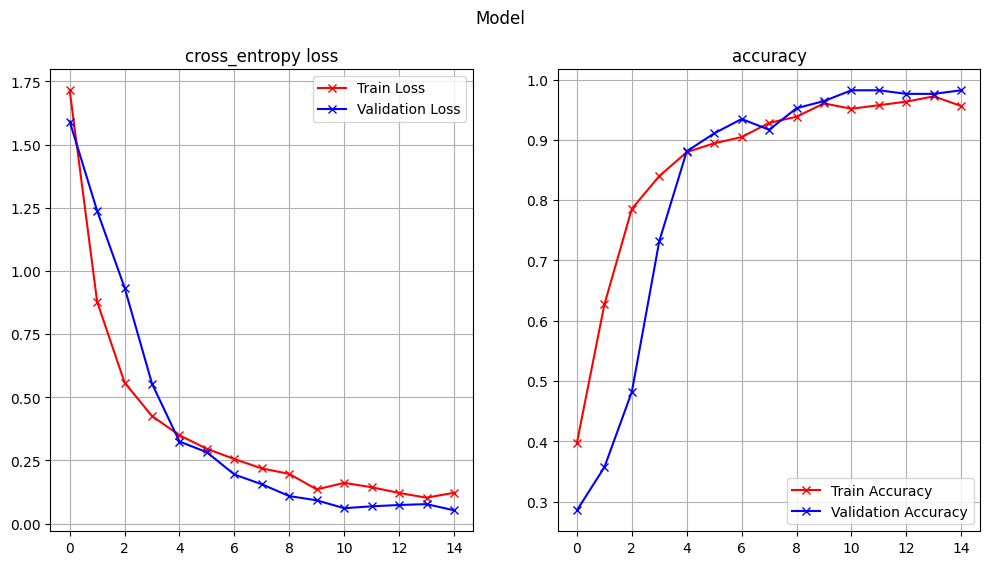

In [6]:
def plot_loss_accuracy(history,title):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

    plt.suptitle(title)
    
evaluation_results = model.evaluate(validation_data, verbose=0)
print('Validation Loss:', evaluation_results[0])
print('Validation Accuracy:', evaluation_results[1])
plot_loss_accuracy(history,'Model')

#### ***The model achieved a score of 98% in validation accuracy with a loss of 0.05. The graph above shows consistency, maintaining an accuracy of beyond 95% after 9 epochs. For this mood detection task, I chose to create a model with the use of MobileNet. I freeze some of its layers and fine-tuned the last 10 layers. It contributes to the high accuracy and fewer loss achieved by the model. Moreover, I used a learning rate of 0.0001, and a dropout rate of 80%. I also used softmax activation function for multi-class classification.***

### **Mood detection using Haar Cascade and Trained Model:** 

In [7]:
# Haar cascade classifier for face detection
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

# Confidence threshold for emotion prediction
CONFIDENCE_THRESHOLD = 0.5  

while True:
    ret, test_img = cap.read()  
    if not ret:
        continue
    
    # Convert the captured frame to grayscale
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Detect faces in the grayscale image
    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        # Rectangle around the detected face
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=3)
        
        # Extracting the region of interest (ROI) containing the face
        roi_gray = gray_img[y:y + w, x:x + h]  
        roi_gray = cv2.resize(roi_gray, (224, 224))
        
        # Preprocess the ROI for model input
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        # Make predictions using the model
        predictions = model.predict(img_pixels)
        max_index = np.argmax(predictions[0])

        # Check if the predicted emotion confidence is above the threshold
        if predictions[0][max_index] >= CONFIDENCE_THRESHOLD:
            emotions = ('Antonette: angry', 'Antonette: confused', 'Antonette: happy', 'Antonette: sad')
            predicted_emotion = emotions[max_index]
        else:
            predicted_emotion = "Unknown Face"

        # Put the predicted emotion label on the image
        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  
        break

cap.release()
cv2.destroyAllWindows()

#### ***The code above implements mood detection using a webcam. First, Haar cascade classifier is used for detecting a face. The classifier locates faces in each frame captured by the webcam. For each detected face, a rectangle will be drawn around it. Then, the region of interest (ROI) containing the faces will be extracted and resized to (224,224) for the model input. This preprocessed image will be fed into a model for emotion prediction. If the model predicts an emotion with a confidence above a threshold of 0.5, it labels the image based on the predicted emotion. However, if it's below the confidence threshold, the face will be labeled as "Unknown Face". This loop continues until 'q' key will be pressed.***

----

### **Results:**

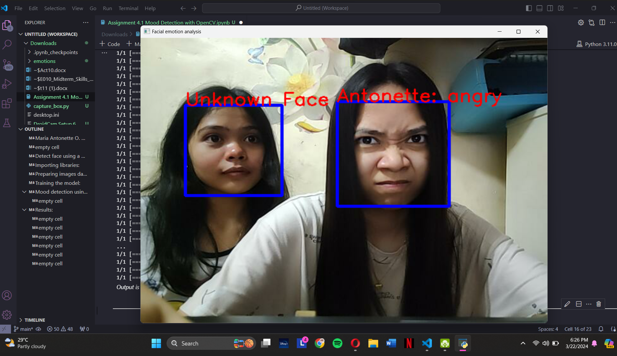

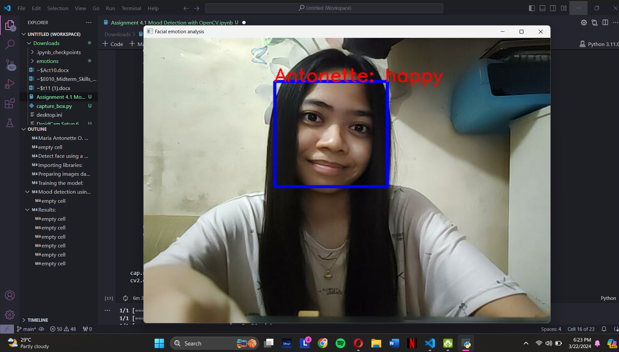

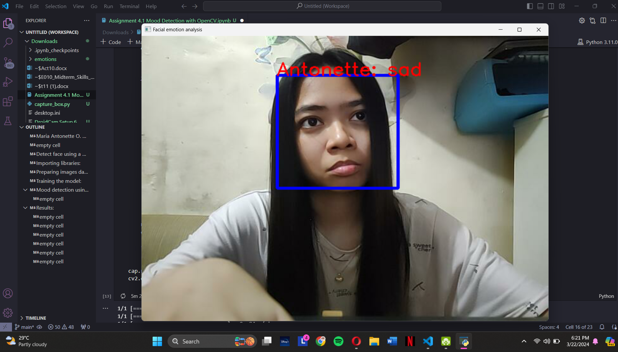

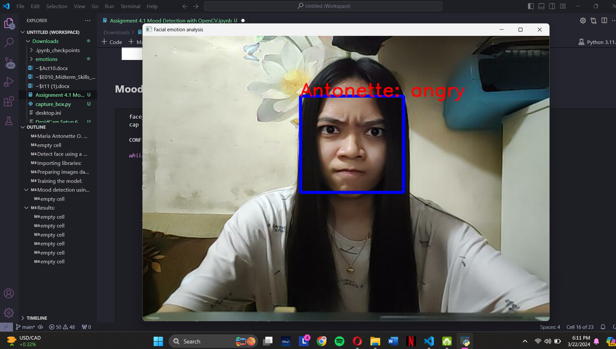

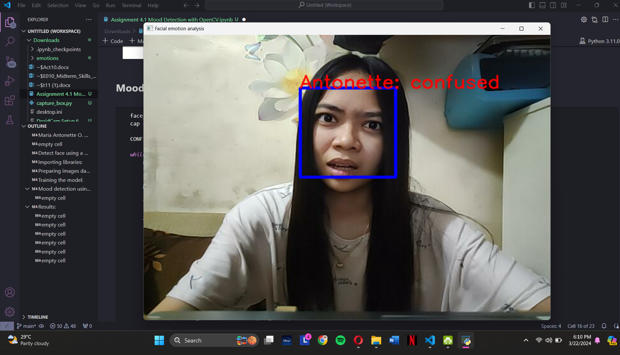

### **Conclusion:**

#### ***To sum up, this task combines face detection using a Haar cascade classifier with mood detection through a deep learning model. The fine-tuned MobileNet model achieves a validation accuracy of 98% with a loss of 0.05. Moreover, using a confidence threshold of 0.5 ensures if the detected face is mine or not, and the lower confidence results to a label of "Unknown Face."***

---

Gdrive link for the dataset: 

https://drive.google.com/drive/folders/1mv3fFmchJt0H2NRiHJRX0biis2lFa9j8?usp=drive_link